<a href="https://colab.research.google.com/github/anshupandey/Deep-Learning-for-structured-Data/blob/main/code_multi_variate_timeseries_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate times series forecasting



```
No: row number
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration
DEWP: Dew Point
TEMP: Temperature
PRES: Pressure
cbwd: Combined wind direction
Iws: Cumulated wind speed
Is: Cumulated hours of snow
Ir: Cumulated hours of rain

```



In [ ]:
!wget -q https://raw.githubusercontent.com/aspdiscovery123/Deep-Learning-for-structure-data/master/pollution.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
def parse(x):
  return dt.strptime(x, '%Y %m %d %H')

In [ ]:
df = pd.read_csv("pollution.csv",parse_dates=[['year','month','day','hour']],index_col='No',date_parser=parse)


In [ ]:
df.shape

(43824, 9)

In [ ]:
df.head()

,year_month_day_hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,
1,2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df['pm2.5'].isnull().sum()

2067

In [ ]:
df.head(30)

,year_month_day_hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,
1,2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
6,2010-01-01 05:00:00,NaN,-19,-10.0,1017.0,NW,16.10,0,0
7,2010-01-01 06:00:00,NaN,-19,-9.0,1017.0,NW,19.23,0,0
8,2010-01-01 07:00:00,NaN,-19,-9.0,1017.0,NW,21.02,0,0
9,2010-01-01 08:00:00,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [ ]:
df = df[24:]
df.shape

(43800, 9)

In [ ]:
df.head()

,year_month_day_hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,
25,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
26,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
27,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
28,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
29,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
df.fillna(0,inplace=True)
df.isnull().sum()

year_month_day_hour    0
pm2.5                  0
DEWP                   0
TEMP                   0
PRES                   0
cbwd                   0
Iws                    0
Is                     0
Ir                     0
dtype: int64

In [ ]:
df.head()

,year_month_day_hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,
25,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
26,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
27,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
28,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
29,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
df.cbwd.value_counts()

SE    15290
NW    14130
cv     9384
NE     4996
Name: cbwd, dtype: int64

In [ ]:
df2 = df.copy()
df2.index = df2.year_month_day_hour
df2.drop(columns=['year_month_day_hour'],inplace=True)

In [ ]:
df2.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
y = df2['pm2.5']
df2 = df2.shift()
df2.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02 01:00:00,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0
2010-01-02 02:00:00,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0
2010-01-02 03:00:00,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0
2010-01-02 04:00:00,181.0,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0


In [ ]:
df2.dropna(inplace=True)
df2.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-02 01:00:00,129.0,-16.0,-4.0,1020.0,SE,1.79,0.0,0.0
2010-01-02 02:00:00,148.0,-15.0,-4.0,1020.0,SE,2.68,0.0,0.0
2010-01-02 03:00:00,159.0,-11.0,-5.0,1021.0,SE,3.57,0.0,0.0
2010-01-02 04:00:00,181.0,-7.0,-5.0,1022.0,SE,5.36,1.0,0.0
2010-01-02 05:00:00,138.0,-7.0,-5.0,1022.0,SE,6.25,2.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([('ohe',OneHotEncoder(),[4]),
                                  ('mm',MinMaxScaler(),[0,1,2,3,5,6,7])])
transformer.fit(df2)
df3 = transformer.transform(df2)
df3.shape

(43799, 11)

In [ ]:
y.shape

(43800,)

In [ ]:
y = y[1:]
y.shape

(43799,)

In [ ]:
pd.DataFrame(df3).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,1.0,0.0,0.129779,0.352941,0.245902,0.527273,0.002290,0.000000,0.0
1,0.0,0.0,1.0,0.0,0.148893,0.367647,0.245902,0.527273,0.003811,0.000000,0.0
2,0.0,0.0,1.0,0.0,0.159960,0.426471,0.229508,0.545455,0.005332,0.000000,0.0
3,0.0,0.0,1.0,0.0,0.182093,0.485294,0.229508,0.563636,0.008391,0.037037,0.0
4,0.0,0.0,1.0,0.0,0.138833,0.485294,0.229508,0.563636,0.009912,0.074074,0.0


In [ ]:
y.head()

year_month_day_hour
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
2010-01-02 05:00:00    109.0
Name: pm2.5, dtype: float64

In [ ]:
df3.shape

(43799, 11)

In [ ]:
# samples, timestamps, features
df3 = df3.reshape(-1,1,11)
df3.shape

(43799, 1, 11)

## Modelling of LSTM network

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
ip_layer = layers.Input(shape=(1,11))
lstm_layer = layers.LSTM(25,activation='relu')(ip_layer)
op = layers.Dense(1)(lstm_layer)

model = models.Model(inputs=ip_layer,outputs=op)
model.compile(loss='mae',optimizer='adam')
model.fit(df3,y,batch_size=360,epochs=20,shuffle=False)

Epoch 1/20
122/122 [==============================] - 5s 6ms/step - loss: 93.5947
Epoch 2/20
122/122 [==============================] - 1s 6ms/step - loss: 90.9473
Epoch 3/20
122/122 [==============================] - 1s 6ms/step - loss: 84.1770
Epoch 4/20
122/122 [==============================] - 1s 6ms/step - loss: 76.3290
Epoch 5/20
122/122 [==============================] - 1s 6ms/step - loss: 70.0509
Epoch 6/20
122/122 [==============================] - 1s 6ms/step - loss: 65.6764
Epoch 7/20
122/122 [==============================] - 1s 6ms/step - loss: 63.0060
Epoch 8/20
122/122 [==============================] - 1s 6ms/step - loss: 61.3680
Epoch 9/20
122/122 [==============================] - 1s 6ms/step - loss: 60.1023
Epoch 10/20
122/122 [==============================] - 1s 7ms/step - loss: 58.9587
Epoch 11/20
122/122 [==============================] - 1s 6ms/step - loss: 57.9298
Epoch 12/20
122/122 [==============================] - 1s 6ms/step - loss: 57.0819
Epoch 13/20
1

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 11)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 25)                3700      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 3,726
Trainable params: 3,726
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(df3,y,batch_size=720,epochs=10,shuffle=False)

Epoch 1/10
61/61 [==============================] - 0s 7ms/step - loss: 52.0344
Epoch 2/10
61/61 [==============================] - 0s 7ms/step - loss: 51.6700
Epoch 3/10
61/61 [==============================] - 0s 7ms/step - loss: 51.2873
Epoch 4/10
61/61 [==============================] - 0s 7ms/step - loss: 50.8837
Epoch 5/10
61/61 [==============================] - 0s 7ms/step - loss: 50.4568
Epoch 6/10
61/61 [==============================] - 0s 6ms/step - loss: 50.0040
Epoch 7/10
61/61 [==============================] - 0s 6ms/step - loss: 49.5243
Epoch 8/10
61/61 [==============================] - 0s 7ms/step - loss: 49.0161
Epoch 9/10
61/61 [==============================] - 0s 6ms/step - loss: 48.4799
Epoch 10/10
61/61 [==============================] - 0s 7ms/step - loss: 47.9133


In [ ]:
model.fit(df3,y,batch_size=1440,epochs=20,shuffle=False)

Epoch 1/20
31/31 [==============================] - 0s 7ms/step - loss: 47.4505
Epoch 2/20
31/31 [==============================] - 0s 6ms/step - loss: 47.1403
Epoch 3/20
31/31 [==============================] - 0s 7ms/step - loss: 46.8168
Epoch 4/20
31/31 [==============================] - 0s 7ms/step - loss: 46.4849
Epoch 5/20
31/31 [==============================] - 0s 7ms/step - loss: 46.1437
Epoch 6/20
31/31 [==============================] - 0s 7ms/step - loss: 45.7921
Epoch 7/20
31/31 [==============================] - 0s 6ms/step - loss: 45.4308
Epoch 8/20
31/31 [==============================] - 0s 7ms/step - loss: 45.0597
Epoch 9/20
31/31 [==============================] - 0s 7ms/step - loss: 44.6783
Epoch 10/20
31/31 [==============================] - 0s 6ms/step - loss: 44.2855
Epoch 11/20
31/31 [==============================] - 0s 6ms/step - loss: 43.8790
Epoch 12/20
31/31 [==============================] - 0s 6ms/step - loss: 43.4617
Epoch 13/20
31/31 [==================

In [ ]:
df4 = df.copy()
df4.index = df4.year_month_day_hour
df4.drop(columns=['year_month_day_hour'],inplace=True)

In [ ]:
df4.columns

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [ ]:
df4.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


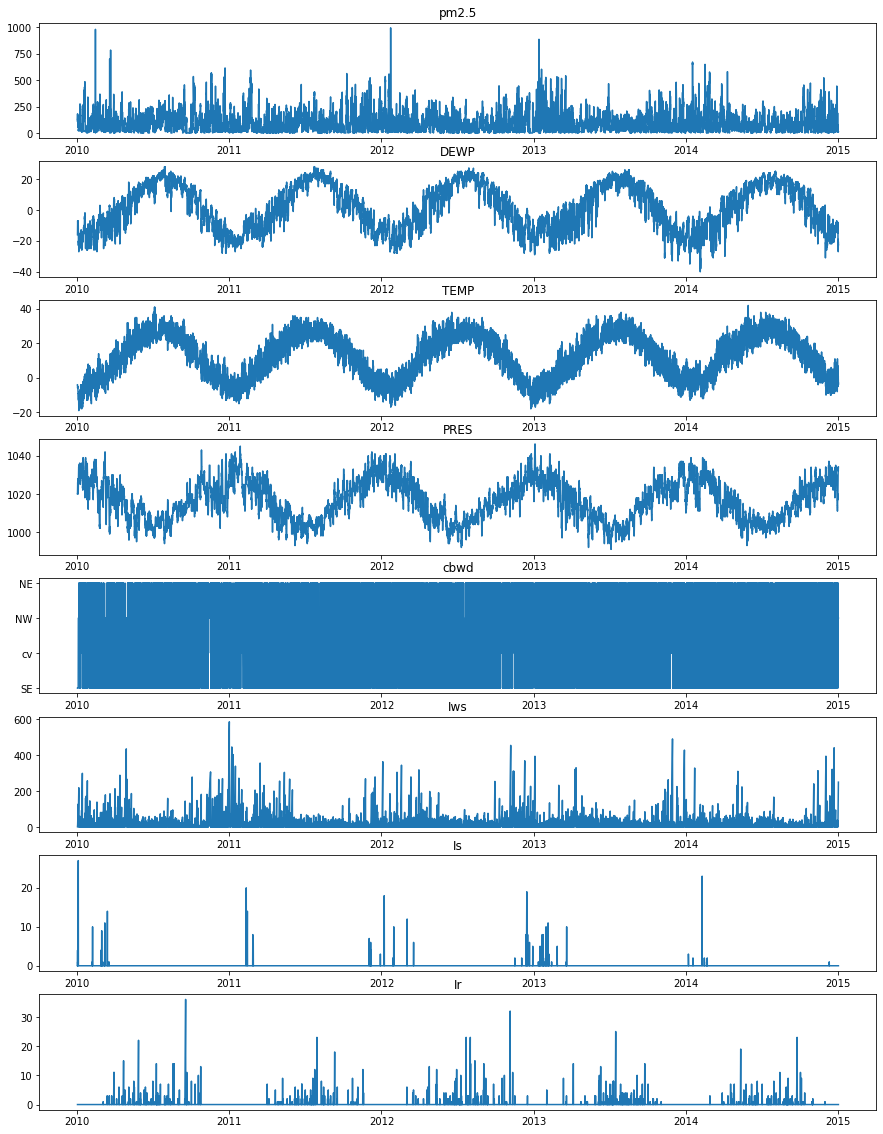

In [ ]:
plt.figure(figsize=(15,20))
for i in range(len(df4.columns)):
  plt.subplot(len(df4.columns),1,i+1)
  plt.plot(df4[df4.columns[i]])
  plt.title(df4.columns[i])
plt.show()

In [ ]:
df4.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
df4.columns

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
df4['cbwd'] = le.fit_transform(df['cbwd'])
mm = MinMaxScaler()
df4[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']] = mm.fit_transform(df4[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])
df4.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-02 00:00:00,0.129779,0.352941,0.245902,0.527273,2,0.002290,0.000000,0.0
2010-01-02 01:00:00,0.148893,0.367647,0.245902,0.527273,2,0.003811,0.000000,0.0
2010-01-02 02:00:00,0.159960,0.426471,0.229508,0.545455,2,0.005332,0.000000,0.0
2010-01-02 03:00:00,0.182093,0.485294,0.229508,0.563636,2,0.008391,0.037037,0.0
2010-01-02 04:00:00,0.138833,0.485294,0.229508,0.563636,2,0.009912,0.074074,0.0


# Sequence size = 24 (24 hours)

In [ ]:
df4.shape

(43800, 8)

In [ ]:
def split_sequence(sequence,n_steps):
  x = []
  y = []
  for i in range(len(sequence)):
    # get the end index of the pattern 
    end_ix = i + n_steps
    # check if the iteration is beyond the size of sequence, break the loop
    if end_ix > len(sequence)-1:
      break
    # collect the input and output parts of the pattern
    seq_x, seq_y = sequence.iloc[i:end_ix],sequence.iloc[i,0]
    x.append(seq_x)
    y.append(seq_y)
  return np.array(x),np.array(y)

In [ ]:
x,y = split_sequence(df4,n_steps=24)
x.shape,y.shape

((43776, 24, 8), (43776,))

In [ ]:
xtr,xts = x[:35020,:,:],x[35020:,:,:]
ytr,yts = y[:35020],y[35020:]
print(xtr.shape,xts.shape)
print(ytr.shape,yts.shape)

(35020, 24, 8) (8756, 24, 8)
(35020,) (8756,)


## Modelling the LSTM network

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
ip_layer = layers.Input(shape=(24,8))
lstm_layer = layers.LSTM(400,activation='relu',return_sequences=True)(ip_layer)
lstm_layer = layers.LSTM(600,activation='relu',return_sequences=False)(lstm_layer)

op = layers.Dense(1)(lstm_layer)

model = models.Model(inputs=ip_layer,outputs=op)
model.compile(loss='mae',optimizer='adam')
model.fit(xtr,ytr,batch_size=240,epochs=20,shuffle=False,validation_data=(xts,yts))

Epoch 1/20
146/146 [==============================] - 370s 3s/step - loss: 0.0625 - val_loss: 0.0874
Epoch 2/20
146/146 [==============================] - 370s 3s/step - loss: 0.0601 - val_loss: 0.0660
Epoch 3/20
146/146 [==============================] - 370s 3s/step - loss: 0.0619 - val_loss: 0.0827
Epoch 4/20
146/146 [==============================] - 367s 3s/step - loss: 0.0546 - val_loss: 0.0645
Epoch 5/20
146/146 [==============================] - 366s 3s/step - loss: 0.0603 - val_loss: 0.0605
Epoch 6/20
146/146 [==============================] - 366s 3s/step - loss: 0.0513 - val_loss: 0.0554
Epoch 7/20
146/146 [==============================] - 368s 3s/step - loss: 0.0486 - val_loss: 0.0615
Epoch 8/20
146/146 [==============================] - 366s 3s/step - loss: 0.0499 - val_loss: 0.0690
Epoch 9/20
146/146 [==============================] - 365s 3s/step - loss: 0.0529 - val_loss: 0.0526
Epoch 10/20
127/146 [=========================>....] - ETA: 43s - loss: 0.0415